<a href="https://colab.research.google.com/github/sztistvan/anomaly_detection/blob/main/anomaly_detection_chatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Anomaly Detection in Time Series using ChatGPT
This is the notebook used for the Medium publication:

"**Anomaly Detection in Time Series using ChatGPT**"


## First example

**QUERY**: Create an example to demonstrate anomaly detection in time series data. Use Python without any specific package.

**ChatGPT**: ... for this example, I'll be using the **Numenta Anomaly Benchmark (NAB)** dataset, which contains a variety of real-world time series data with labeled anomalies. Specifically, I'll be using the "*machine_temperature_system_failure.csv*" dataset, which consists of temperature readings from a machine in an industrial setting.

To perform anomaly detection on this dataset, I'll be using a simple statistical method called the **Moving Average (MA)** technique. The MA technique calculates the moving average of the data over a specified time window and detects anomalies based on deviations from the moving average.

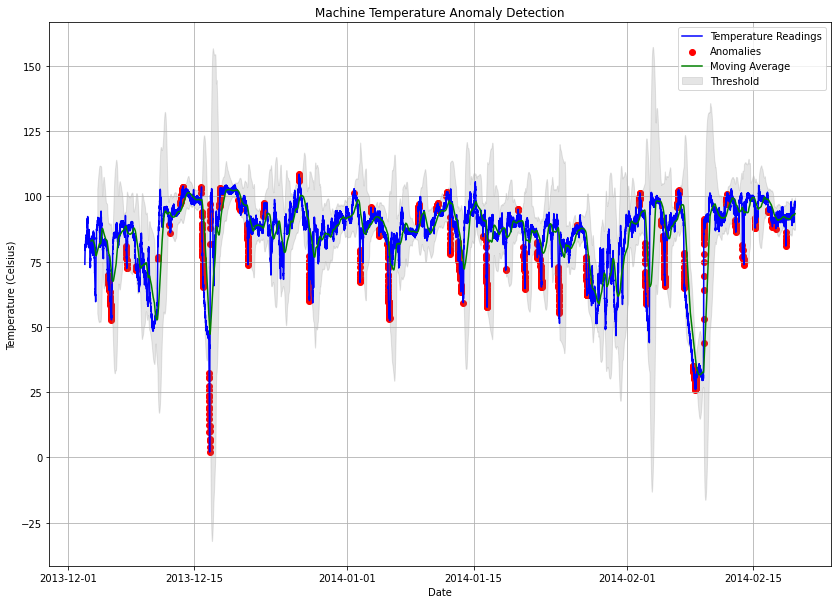

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv')

# Convert the timestamp column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate the moving average of the temperature readings
window_size = 200 # MODIFICATION, 50
ma = df['value'].rolling(window_size).mean()

# Calculate the deviation from the moving average
deviation = df['value'] - ma

# Calculate the standard deviation of the deviation
std_deviation = deviation.rolling(window_size).std()

# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Detect anomalies based on deviations from the moving average
anomalies = df[deviation.abs() > threshold]

# Plot the temperature readings and the anomalies
plt.subplots(figsize=(14, 10)) # MODIFICATION, inserted
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomalies')
plt.plot(df['timestamp'], ma, color='green', label='Moving Average')
plt.fill_between(df['timestamp'], ma-threshold, ma+threshold, color='gray', alpha=0.2, label='Threshold')
plt.legend()
plt.title('Machine Temperature Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid() # MODIFICATION, inserted
plt.show()


**ChatGPT**: This code will load the dataset, convert the timestamp column to a datetime object, calculate the moving average of the temperature readings, calculate the deviation from the moving average, calculate the standard deviation of the deviation, calculate the threshold for anomaly detection, detect anomalies based on deviations from the moving average, and plot the temperature readings and the anomalies.

The code also plots the moving average and the threshold for anomaly detection as a gray shaded region.

**QUERY**: What is the **Numenta Anomaly Benchmark (NAB)** dataset and how can I access it?

**ChatGPT**: The **Numenta Anomaly Benchmark (NAB)** is a benchmark dataset developed by the research team at Numenta to evaluate anomaly detection algorithms. The dataset consists of real-world time-series data that have been labeled with anomalies, making it useful for testing and comparing different anomaly detection algorithms. The dataset includes a variety of data types, including server metrics, network traffic, and environmental sensor data.

To access the NAB dataset, you can visit the official website at **https://github.com/numenta/NAB**. The dataset is available for free and can be downloaded from the Github repository. The dataset comes with a set of Python scripts that can be used to evaluate the performance of different anomaly detection algorithms on the dataset. The website also provides documentation and examples to help you get started with using the dataset.

Related info:

- Kaggle: https://www.kaggle.com/datasets/boltzmannbrain/nab
- Ahmad, Subutai, Alexander Lavin, Scott Purdy, and Zuha Agha. “Unsupervised Real-Time Anomaly Detection for Streaming Data.” Neurocomputing, Online Real-Time Learning Strategies for Data Streams, 262 (November 1, 2017): 134–47. https://doi.org/10.1016/j.neucom.2017.04.070.


**QUERY**: Why did you use for threshold 3 times the standard deviation?

**ChatGPT**: The choice of using 3 times the standard deviation as a threshold is based on the empirical rule, also known as the 68-95-99.7 rule, which states that in a normal distribution:

- Approximately 68% of the data falls within one standard deviation of the mean.
- Approximately 95% of the data falls within two standard deviations of the mean.
- Approximately 99.7% of the data falls within three standard deviations of the mean.

Therefore, setting a threshold at mean plus or minus 3 times the standard deviation captures almost all of the data in a normal distribution. This threshold is often used in statistical analysis to identify outliers or extreme values in a dataset.

However, it's important to note that this rule may not always be appropriate for all datasets, particularly if the distribution is not normal or if the data has outliers. In these cases, alternative methods for setting thresholds may be more appropriate.

### Global threshold based on statistical properties
Calculating mean and standard deviation, applying **Z-score**

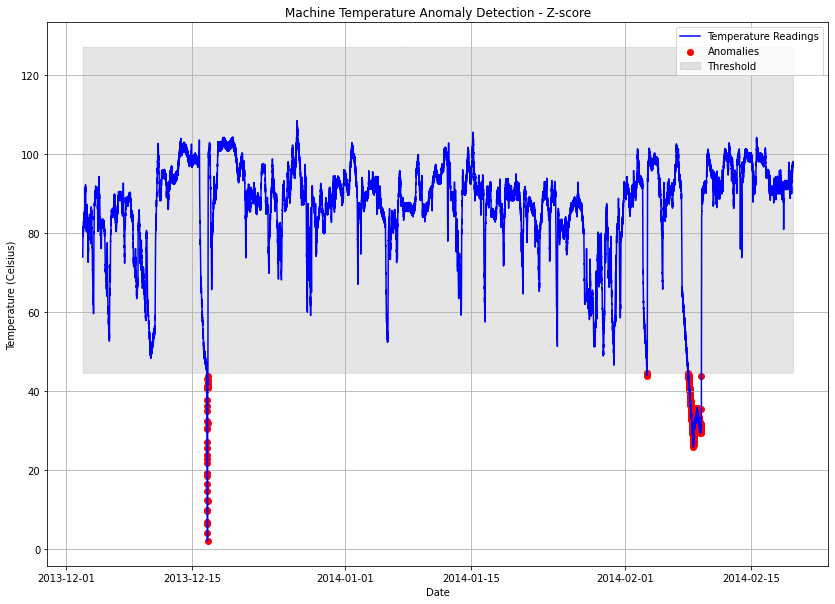

"\nplt.subplots(figsize=(14, 10))\nplt.legend()\nplt.title('Machine Temperature Z-score')\nplt.xlabel('Date')\nplt.ylabel('Z-score')\nplt.plot(df['timestamp'], z_score, color='blue', label='Z-score')\nplt.grid()\nplt.show()\n"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv')

# Convert the timestamp column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate the average of the temperature readings
mean = df['value'].mean()

# Calculate the deviation from the average
deviation = df['value'] - mean

# Calculate the standard deviation of the deviation
std_deviation = deviation.std() # same as we would calculate df['value'].std()

# Calculate Z-score - we don't use it directly, just for reference
z_score = deviation / std_deviation # z_score = (value-mean)/std

# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Detect anomalies based on deviations from the moving average
anomalies = df[deviation.abs() > threshold]

# Plot the temperature readings and the anomalies
plt.subplots(figsize=(14, 10))
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomalies')
plt.fill_between(df['timestamp'], mean-threshold, mean+threshold, color='gray', alpha=0.2, label='Threshold')
plt.legend()
plt.title('Machine Temperature Anomaly Detection - Z-score')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.show()

'''
plt.subplots(figsize=(14, 10))
plt.legend()
plt.title('Machine Temperature Z-score')
plt.xlabel('Date')
plt.ylabel('Z-score')
plt.plot(df['timestamp'], z_score, color='blue', label='Z-score')
plt.grid()
plt.show()
'''

### Global threshold based on percentiles

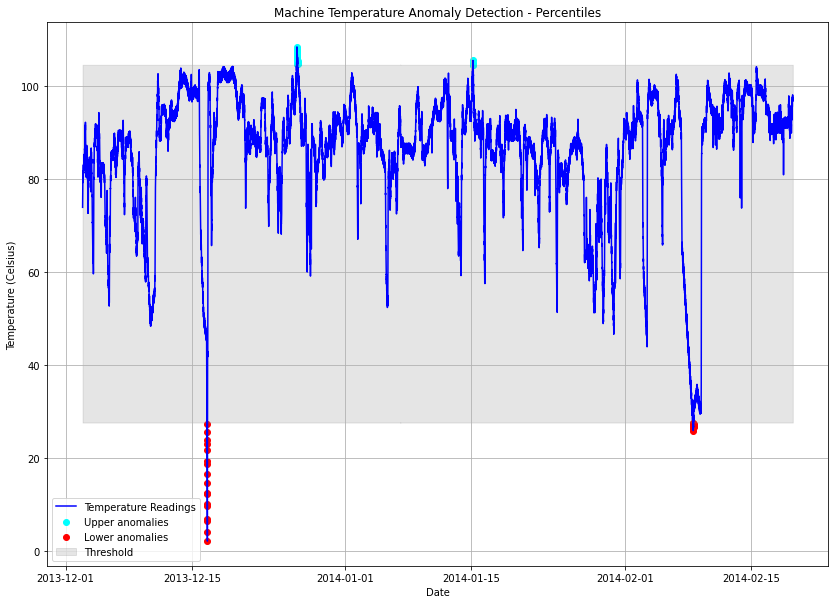

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv')

# Convert the timestamp column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# calculate percentile limits
percent_limit = 0.3 # 99.7% is set
upper_threshold = df['value'].quantile((100-percent_limit/2)/100) 
lower_threshold = df['value'].quantile(percent_limit/2/100) 

# Detect anomalies based on percentile limits
anomalies_upper = df[df['value'] > upper_threshold]
anomalies_lower = df[df['value'] < lower_threshold]

# Plot the temperature readings and the anomalies
plt.subplots(figsize=(14, 10)) 
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies_upper['timestamp'], anomalies_upper['value'], color='cyan', label='Upper anomalies')
plt.scatter(anomalies_lower['timestamp'], anomalies_lower['value'], color='red', label='Lower anomalies')
plt.fill_between(df['timestamp'], lower_threshold, upper_threshold, color='gray', alpha=0.2, label='Threshold')
plt.legend()
plt.title('Machine Temperature Anomaly Detection - Percentiles')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid() 
plt.show()


## Anomaly detection

**QUERY**: What is anomaly detection in time series and how does it differ from change point detection?

**ChatGPT**: Anomaly detection in time series involves identifying data points or events that deviate significantly from the expected or normal behavior of the time series. Anomaly detection is an important task in many fields, including finance, cybersecurity, and manufacturing, as anomalies can indicate potential problems or opportunities in the underlying system or process that generates the data.

- **Anomaly detection** algorithms typically use statistical methods, machine learning, or a combination of both to detect anomalies in time series data. These algorithms can be classified into two main categories: supervised and unsupervised. In supervised anomaly detection, the algorithm is trained on labeled data that includes both normal and anomalous examples, and it uses this information to identify anomalies in new data. In unsupervised anomaly detection, the algorithm is not provided with labeled data, and it must learn the normal behavior of the time series and identify deviations from this behavior.

- **Change point detection**, on the other hand, involves identifying points in time where the statistical properties of the time series change abruptly. Change point detection algorithms can be used to detect changes in the mean, variance, or other properties of the time series. Change point detection can be used to identify significant events or transitions in the underlying system or process that generates the data.

The main difference between anomaly detection and change point detection is that anomaly detection focuses on identifying individual data points or events that deviate significantly from the normal behavior of the time series, whereas change point detection focuses on identifying points in time where the statistical properties of the time series change abruptly. Anomalies can occur at any time in the time series, whereas change points occur at specific points in time.

**QUERY**: What types of anomalies are in time series?

**ChatGPT**: In time series analysis, there are several types of anomalies that can occur, including:
1. **Point anomalies**: A point anomaly is a single data point that is significantly different from the rest of the data. It can be caused by measurement errors, system malfunctions, or other factors.
2. **Contextual anomalies**: Contextual anomalies are data points that are not unusual on their own, but become anomalous in a particular context. For example, a sudden spike in website traffic on a holiday is not unusual, but a similar spike on a regular weekday could be an anomaly.
3. **Collective anomalies**: Collective anomalies are groups of data points that are anomalous when considered together. They can be caused by changes in the underlying system or by external factors affecting the system.
4. **Seasonal anomalies**: Seasonal anomalies occur when the time series data show regular patterns or cycles, but a particular cycle deviates significantly from the expected pattern. For example, unusually high sales during a non-peak season would be a seasonal anomaly.
5. **Cyclical anomalies**: Cyclical anomalies occur when the time series data shows long-term cycles or trends that deviate significantly from the expected pattern. These anomalies are often caused by external factors such as economic recessions or natural disasters.

**QUERY**: What specific machine learning algorithms are for anomaly detection in time series?

**ChatGPT**:
There are several machine learning algorithms that can be used for anomaly detection in time series data. Here are some of the most commonly used ones:

1. **Autoencoder**: An autoencoder is a neural network that can be trained to reconstruct the input data. When an anomaly is detected, the reconstructed output will be significantly different from the input data.

2. **Isolation Forest**: Isolation Forest is an unsupervised machine learning algorithm that uses decision trees to isolate anomalies from the rest of the data. It works by randomly partitioning the data into subsets until each data point is isolated in its own partition. The fewer partitions a data point needs to be isolated, the more anomalous it is considered to be.

3. **Local Outlier Factor (LOF)**: LOF is a density-based anomaly detection algorithm that measures the local density of a point with respect to its neighbors. Points with a lower density than their neighbors are considered to be outliers.

4. **One-Class Support Vector Machine (SVM)**: One-Class SVM is a type of SVM that is trained on only one class of data. It learns a decision boundary that separates the training data from the origin, and any point on the other side of the boundary is considered an anomaly.

5. **Prophet**: Prophet is a time series forecasting algorithm developed by Facebook that can also be used for anomaly detection. It decomposes time series data into trend, seasonality, and noise components, and then uses a Bayesian approach to model the trend and seasonality components.

6. **LSTM-based models**: Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that is well suited for modeling sequential data. LSTM-based models can be trained to detect anomalies in time series data by learning the patterns and relationships in the data over time. 

7. **ARIMA (AutoRegressive Integrated Moving Average)**: ARIMA is a time series forecasting method that can be used to detect anomalies. It models the time series as a combination of autoregressive (AR), integrated (I), and moving average (MA) components. Anomalies can be detected by comparing the predicted values with the actual values.

8. **Seasonal Hybrid ESD (S-H-ESD)**: S-H-ESD is a variant of the ESD algorithm that can be used to detect anomalies in seasonal time series. It takes into account the seasonal patterns in the data and uses a hybrid approach that combines the ESD algorithm with a seasonal decomposition of the time series.

It's worth noting that the effectiveness of each algorithm will depend on the specific characteristics of your data and the nature of the anomalies you are trying to detect. Therefore, it's important to experiment with different algorithms and evaluate their performance on your specific use case.


## Experiments

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv')

# Convert the timestamp column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the timestamp column as the index and convert to a series
series = df.set_index('timestamp')['value'].squeeze()

### Isolation Forest
Isolation Forest belongs to the type of unsupervised machine learning algorithms. It uses an ensemble of decision trees to isolate anomalous points in the data.

Here's how the algorithm works:

1. Randomly select a feature and a split point in the feature space.
2. Partition the data into two groups using the feature and split point.
3. Repeat steps 1 and 2 recursively on the resulting partitions until each point is isolated in its own partition.
4. The number of partitions it takes to isolate a point is a measure of how anomalous that point is. 

**Points that can be isolated with fewer partitions are considered more anomalous**.

**QUERY**: Create a python function that detects anomalies in time series by applying the Isolation Forest algorithm. The function input is a Pandas series.

In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest

def detect_anomalies_with_isolation_forest(series):
    # Convert the series to a 2D NumPy array
    data = series.values.reshape(-1, 1)
    
    # Create an instance of the IsolationForest class
    #model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
    model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

    # Fit the model to the data and predict anomalies
    model.fit(data)
    anomalies = model.predict(data)
    
    # Convert the predictions back to a Pandas series and return it
    anomalies_series = pd.Series(anomalies, index=series.index)
    return anomalies_series

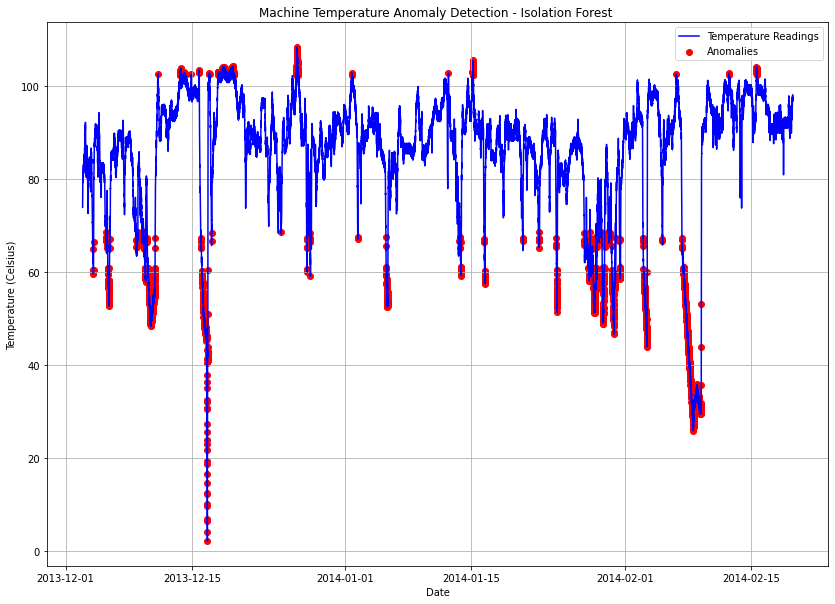

In [6]:
# Detect anomalies using the Isolation Forest algorithm
anomalies = detect_anomalies_with_isolation_forest(series)

# Plot the original series and the detected anomalies
plt.subplots(figsize=(14, 10)) 
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies[anomalies==-1].index, series[anomalies==-1].values, color='red', label='Anomalies')
plt.legend()
plt.title('Machine Temperature Anomaly Detection - Isolation Forest ')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.show()


**QUERY**: Explain Isolation Forest parameters

Here's an explanation of some of the key parameters of the **Isolation Forest** algorithm:

- `n_estimators`: This is the number of decision trees that will be used in the Isolation Forest algorithm. Increasing this value will generally lead to better performance, but will also increase the computational complexity and runtime of the algorithm.

- `max_samples`: This is the number of samples that will be used to build each decision tree in the Isolation Forest algorithm. Increasing this value will generally lead to better performance, but may also increase the risk of overfitting.

- `contamination`: This is the fraction of the input data that is assumed to be anomalous. This parameter is used to determine the decision threshold for classifying a data point as an anomaly. A lower value of contamination will result in a higher decision threshold, meaning that fewer data points will be classified as anomalies. A higher value of contamination will result in a lower decision threshold, meaning that more data points will be classified as anomalies.

- `max_features`: This is the maximum number of features that will be used to build each decision tree in the Isolation Forest algorithm. This parameter is used to control the diversity of the decision trees. A higher value of max_features will result in more diverse decision trees, but may also increase the computational complexity and runtime of the algorithm.

- `bootstrap`: This parameter controls whether or not the training data will be bootstrapped when building each decision tree in the Isolation Forest algorithm. Bootstrapping can help to improve the diversity of the decision trees and reduce the risk of overfitting.

- `random_state`: This parameter is used to set the random seed for the Isolation Forest algorithm. Setting this parameter to a fixed value will ensure that the algorithm produces consistent results across multiple runs, which can be useful for debugging and reproducibility.


### Local Outlier Factor
Local Outlier Factor (LOF) is an unsupervised machine learning algorithm for anomaly detection that works by measuring the local density of each data point and comparing it to the densities of its neighbors. It is based on the idea that anomalous data points are often located in low-density regions of the feature space. 

Here's how the algorithm works:

1. For each data point, identify its k nearest neighbors in the feature space. The value of k is a hyperparameter that must be set before running the algorithm.
2. Compute the local reachability density (LRD) of each point. LRD is a measure of how dense the local neighborhood of a point is compared to its neighbors. It is calculated by taking the inverse of the average reachability distance of a point's k nearest neighbors.
3. Compute the local outlier factor (LOF) of each point. LOF is a measure of how much more or less dense a point is compared to its neighbors. It is calculated by taking the average ratio of the LRD of a point's k nearest neighbors to its own LRD.
4. Points with LOF scores significantly less than 1 are considered anomalies. The threshold for what constitutes a significant difference depends on the dataset and must be set manually.

**QUERY**: Create a function that detects anomalies in time series applying Local Outlier Factor algorithm. The function input is a Pandas series.

In [9]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

def detect_anomalies_with_local_outlier(series):
    #lof = LocalOutlierFactor(n_neighbors=10, contamination='auto')
    lof = LocalOutlierFactor(n_neighbors=40, contamination=0.01)
    X = series.values.reshape(-1,1)
    y_pred = lof.fit_predict(X)
    anomalies = X[y_pred==-1]
    return pd.Series(anomalies.flatten(), index=series.index[y_pred==-1])


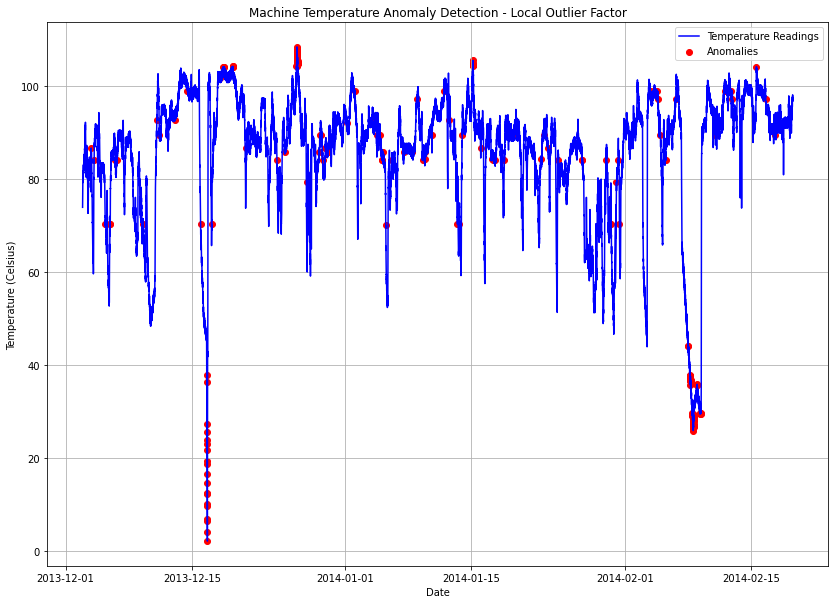

In [8]:
# Detect anomalies using the Isolation Forest algorithm
anomalies = detect_anomalies_with_local_outlier(series)

# Plot the original series and the detected anomalies
plt.subplots(figsize=(14, 10)) 
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.legend()
plt.title('Machine Temperature Anomaly Detection - Local Outlier Factor')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.show()


**QUERY**: Explain Local Outlier Factor parameters.

Sure, here's an explanation of the parameters used in the Local Outlier Factor (LOF) algorithm:

- `n_neighbors`: The number of neighbors used to calculate the local density of each data point. Increasing this value will make the algorithm less sensitive to isolated data points, but may also result in a loss of sensitivity to local outliers. A good rule of thumb is to set this parameter to the smallest value that still captures the local structure of the data.

- `contamination`: The expected proportion of outliers in the data. This parameter is used to set a threshold on the LOF scores, below which data points are considered outliers. The default value of `contamination` is 0.1, which assumes that 10% of the data points are outliers. However, you should adjust this parameter based on the specific characteristics of your data.

In general, you should first set the `n_neighbors` parameter based on the local structure of your data, and then adjust the `contamination` parameter to achieve a desired level of sensitivity to outliers. However, it's important to note that the LOF algorithm is not always guaranteed to work well on all types of data, and you may need to experiment with different parameter settings and outlier detection methods to find the best approach for your specific use case.


### Autoencoder algorithm
Autoencoders belong to unsupervised machine learning algorithms based on neural network models. An autoencoder has two parts: a) encoder and b) decoder. The encoder takes an input and maps it to a lower-dimensional representation. The decoder takes this representation and tries to reconstruct the original input. 

For anomaly detection, we need training data without anomalies thus during training, the autoencoder will be optimized to minimize the difference between the input and the reconstructed output. 

In anomaly detection, by running the generated model on test data, anomalies are detected as data points that have large reconstruction errors.

*ChatGPT proposed the following code block. The problem with this is that it is not separated into training and test phases, so the autoencoder tries to learn the entire data set together with the anomalies.*

In [28]:
import numpy as np
import pandas as pd
from tensorflow import keras

def detect_anomalies_with_autoencoder(series, window_size=20, latent_dim=3, epochs=100):
    # Prepare the input data
    X = []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
    X = np.array(X)
    
    # Define the autoencoder architecture
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(window_size,)),
        keras.layers.Dense(latent_dim, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(window_size, activation='linear')
    ])
    
    # Train the autoencoder
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, X, epochs=epochs, verbose=0)
    
    # Use the trained autoencoder to detect anomalies
    X_pred = model.predict(X)
    mse = np.mean(np.power(X - X_pred, 2), axis=1)
    threshold = np.percentile(mse, 95)
    anomalies = series.iloc[window_size:][mse >= threshold]
    
    return anomalies


705/705 [==============================] - 1s 1ms/step


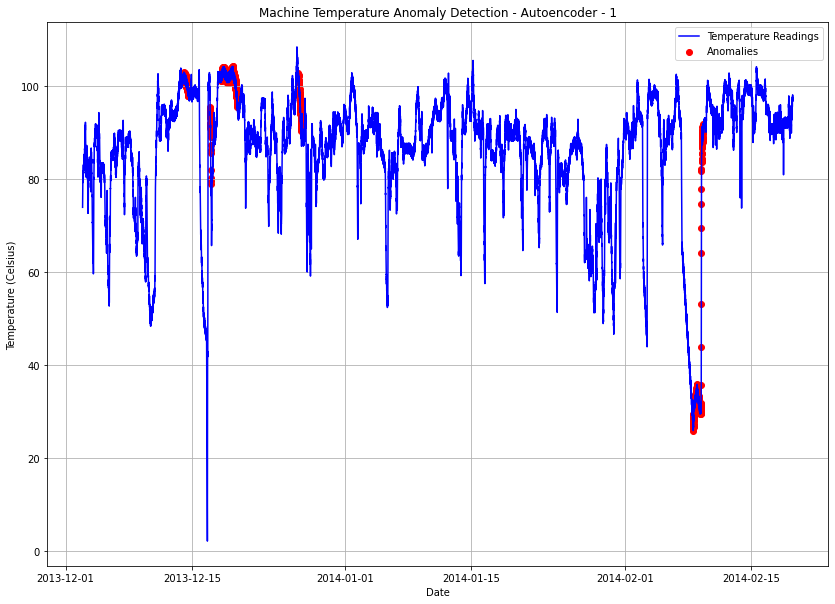

In [35]:
# Detect anomalies using Autoencoder
window_size = 150
latent_dim = 3
anomalies = detect_anomalies_with_autoencoder(series, window_size, latent_dim) 

# Plot the original series and the detected anomalies
plt.subplots(figsize=(14, 10)) 
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.legend()
plt.title('Machine Temperature Anomaly Detection - Autoencoder - 1')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.show()


Manual modification:
- select training data
- create separate functions for model generation, training, and test

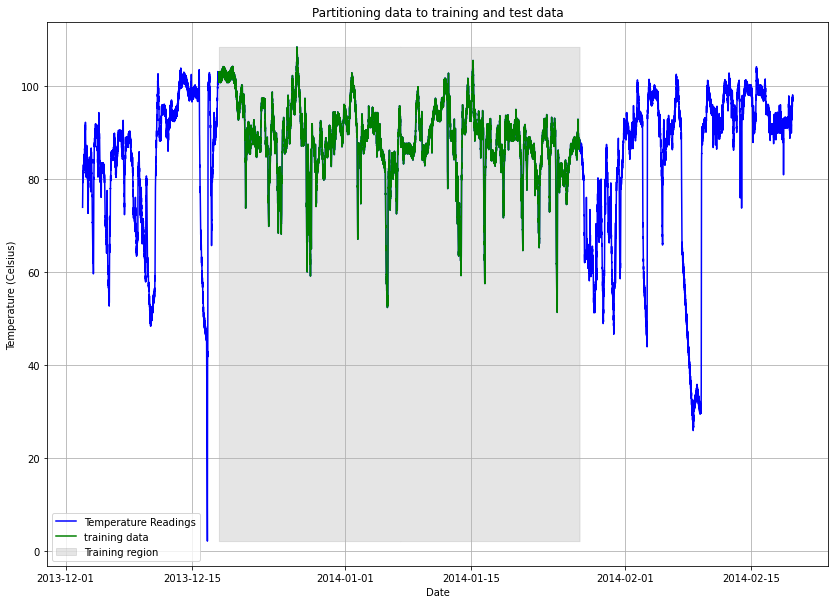

In [30]:
train_series = series.loc['2013-12-18':'2014-01-26']
test_series = series # Run on all data

min_val = series.min()
max_val = series.max()

# Plot the original series and the detected anomalies
plt.subplots(figsize=(14, 10)) 
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.plot(train_series.index, train_series.values, color='green', label='training data')
plt.fill_between(train_series.index, min_val, max_val, color='gray', alpha=0.2, label='Training region')
plt.legend()
plt.title('Partitioning data to training and test data')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.show()

In [31]:
from tensorflow import keras

def build_autoencoder(window_size=20, latent_dim=3):
    """
    Build a simple autoencoder 
    """
    # Define the autoencoder architecture
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(window_size,)),
        keras.layers.Dense(latent_dim, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(window_size, activation='linear')
    ])
    return model

In [32]:
from tensorflow import keras

def train_autoencoder(train_series, model, window_size=20, epochs=100):
    """
    Train the  autoencoder 
    """
    # Prepare the input data
    X = []
    for i in range(len(train_series) - window_size):
        X.append(train_series[i:i+window_size])
    X = np.array(X)

    # Train the autoencoder
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, X, epochs=epochs, verbose=0)
    return model

In [33]:
import numpy as np
import pandas as pd
from tensorflow import keras

def detect_anomalies_with_autoencoder_2(test_series, model, window_size=20):
    # Prepare the input data
    X = []
    for i in range(len(test_series) - window_size):
        X.append(test_series[i:i+window_size])
    X = np.array(X)
    
    # Use the trained autoencoder to detect anomalies
    X_pred = model.predict(X)
    mse = np.mean(np.power(X - X_pred, 2), axis=1)
    threshold = np.percentile(mse, 95)
    anomalies = test_series.iloc[window_size:][mse >= threshold]
    
    return anomalies


705/705 [==============================] - 1s 1ms/step


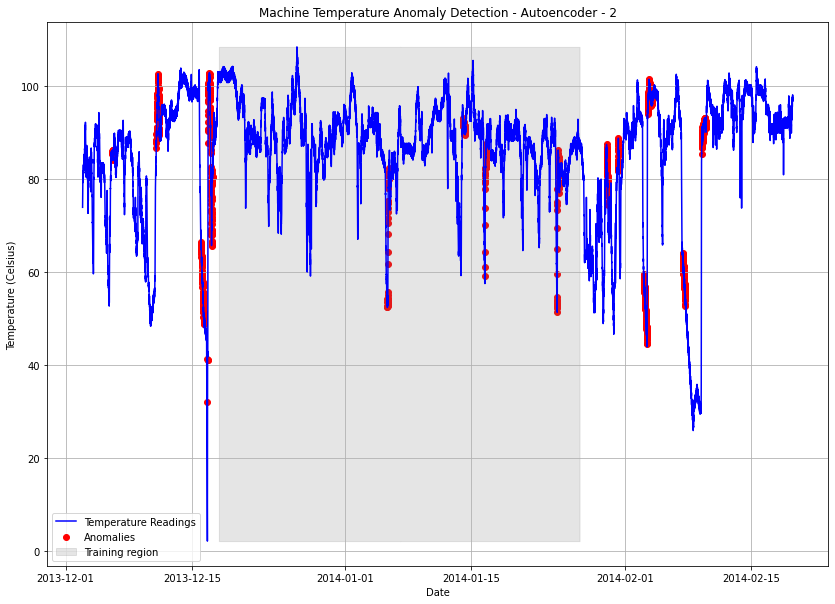

In [36]:
# Detect anomalies using Autoencoder - 2

# Select training data
train_series = series.loc['2013-12-18':'2014-01-26']
test_series = series # Run on all data

min_val = series.min()
max_val = series.max()

# Set autoencoder parameters
window_size = 150
latent_dim = 3
epochs = 100

# Build a simple autoencoder
model = build_autoencoder(window_size, latent_dim)

# Train the  autoencoder 
model = train_autoencoder(train_series, model, window_size, epochs)

# Detect anomalies using the Isolation Forest algorithm
anomalies = detect_anomalies_with_autoencoder_2(test_series, model, window_size)

# Plot the original series and the detected anomalies
plt.subplots(figsize=(14, 10)) 
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.fill_between(train_series.index, min_val, max_val, color='gray', alpha=0.2, label='Training region')
plt.legend()
plt.title('Machine Temperature Anomaly Detection - Autoencoder - 2')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.show()

### ARIMA

**ARIMA Model Components**

ARIMA (Autoregressive Integrated Moving Average) is a popular time series forecasting model that can be used for anomaly detection. It includes the following components:

1. Autoregression (AR)

Autoregression refers to a regression model that uses lagged values of the variable as predictors. In ARIMA, autoregression is represented by the parameter 'p', which specifies the number of lagged observations used in the model.

2. Integration (I)

Integration refers to the use of differencing of raw observations to make the time series stationary. In ARIMA, integration is represented by the parameter 'd', which specifies the number of times the raw observations are differenced.

3. Moving Average (MA)

Moving Average refers to a model that uses the past errors as predictors. In ARIMA, moving average is represented by the parameter 'q', which specifies the size of the moving average window.

The combination of these three components results in the ARIMA model. An ARIMA model can be further extended with seasonal components resulting in the SARIMA model, which includes additional parameters for seasonal autoregression, seasonal integration, and seasonal moving average.


# Counterexample
ChatGPT generated code block will not properly working here becasue it would reuqire more sophisticated data partinioning, determining prediction steps, and so on. 

The overlap between the training and test data is intentional. 

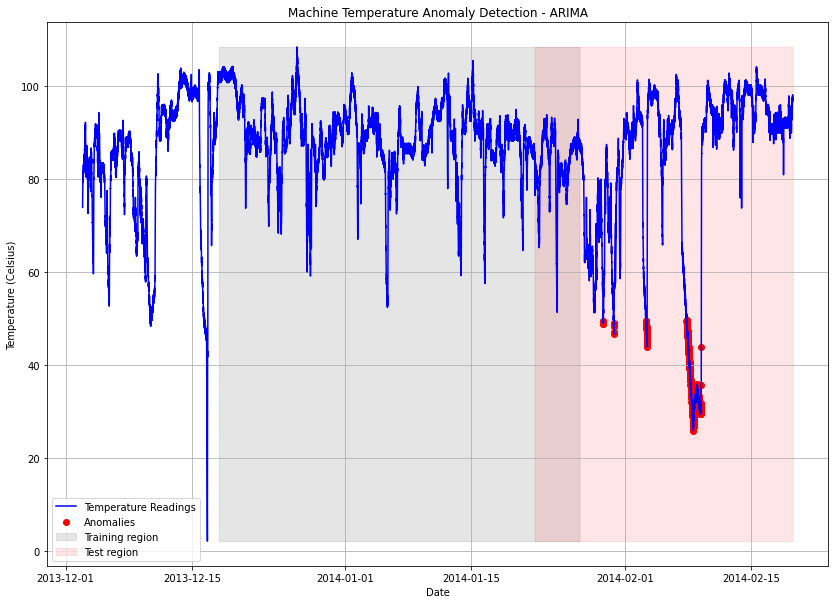

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

min_val = series.min()
max_val = series.max()

# Split the data into training and testing sets
train_series = series.loc['2013-12-18':'2014-01-26']
test_series = series.loc['2014-01-22':] # some overlapping

# ---------------------- CHATGPT ---------------------- :
# Fit an ARIMA model to the training data
model = ARIMA(train_series.values, order=(3,1,1))
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.forecast(steps=len(test_series))[0] # ORIGINAL - resulting a single step prediction
predictions = model_fit.forecast(steps=len(test_series)) 

# Calculate the residuals between the predicted and actual values
residuals = test_series.values - predictions

# Calculate the mean and standard deviation of the residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

# Determine the threshold for anomaly detection
threshold = residual_mean + 2.5 * residual_std

# Identify anomalies in the testing data
anomalies = test_series[abs(residuals) > threshold]
# ---------------------- CHATGPT ---------------------- 

# Plot the original series and the detected anomalies
plt.subplots(figsize=(14, 10)) 
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.fill_between(train_series.index, min_val, max_val, color='gray', alpha=0.2, label='Training region')
plt.fill_between(test_series.index, min_val, max_val, color='red', alpha=0.1, label='Test region')
#plt.plot(test_series.index, predictions, color='green', label='Predictions')
plt.legend()
plt.title('Machine Temperature Anomaly Detection - ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.show()

**Hint**: the line `predictions = model_fit.forecast(steps=len(test_series))[0]` results in a single step prediction value only. This single value will be compared to the values in the test data. Similarly as if we calculated the mean of data. It does not help if we generated a whole series: `predictions = model_fit.forecast(steps=len(test_series)) `. Such a linear model will not be able to predict this well for such a long time. This would require further modifications.